In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [2]:
# Load the CSV file
data = 'Conformation_Percentages_Across_Methods.csv'  # Replace with the correct file path
df = pd.read_csv(data)
df

,Conformation,Percentage (HREX),Error (HREX),"Percentage (Meta, omega, pi)","Error (Meta, omega, pi)","Percentage (Meta, omega, phi, psi)","Error (Meta, omega, phi, psi)","Percentage (Meta, omega, phi, psi, chi)","Error (Meta, omega, phi, psi, chi)",Percentage (REDs),Error (REDs),Percentage (Expanded Ensemble),Error (Expanded Ensemble),Percentage (Expanded Ensemble Filtered),Error (Expanded Ensemble Filtered)
0,ttt,18.158350,0.8104,23.02,0,10.13,0,16.47,0,17.0,2.2,20.200,1.4427,19.900,2.5763
1,tct,23.105794,0.9834,17.97,0,29.72,0,16.93,0,22.7,3.2,23.500,1.6157,23.960,3.0741
2,ttc,13.946706,0.6458,21.74,0,11.76,0,9.53,0,15.0,2.5,14.570,1.0550,14.510,1.9248
3,cct,9.183920,0.4570,4.72,0,5.68,0,6.73,0,8.5,1.6,9.553,0.6962,8.054,1.0957
4,ctt,7.070349,0.3648,11.38,0,9.57,0,7.13,0,7.7,1.6,7.777,0.5826,7.041,0.9724
5,ccc,6.477375,0.3624,4.84,0,11.38,0,8.45,0,6.9,2.0,3.660,0.4387,6.069,0.8628
6,ctc,6.122558,0.3430,6.05,0,2.41,0,8.61,0,7.2,2.3,5.527,1.0004,5.280,0.7677
7,tcc,15.934950,0.7260,9.43,0,18.49,0,25.33,0,14.9,2.5,15.660,0.5222,15.060,1.9869


In [5]:
# Reshape data for bar plot
df_melt = df.melt(
    id_vars=["Conformation"],
    value_vars=[
        "Percentage (HREX)", 
        "Percentage (REDs)",
        "Percentage (Expanded Ensemble)",
        "Percentage (Expanded Ensemble Filtered)",
        "Percentage (Meta, omega, pi)", 
        "Percentage (Meta, omega, phi, psi)", 
        "Percentage (Meta, omega, phi, psi, chi)"        
    ],
    var_name="Method",
    value_name="Percentage"
)

# Extract errors and align them with the melted DataFrame
error_columns = [
    "Error (HREX)", 
    "Error (REDs)",
    "Error (Expanded Ensemble)",
    "Error (Expanded Ensemble Filtered)",
    "Error (Meta, omega, pi)", 
    "Error (Meta, omega, phi, psi)", 
    "Error (Meta, omega, phi, psi, chi)",   
]
error_melt = df.melt(
    id_vars=["Conformation"],
    value_vars=error_columns,
    var_name="Error Method",
    value_name="Error"
)
df_melt["Error"] = error_melt["Error"]

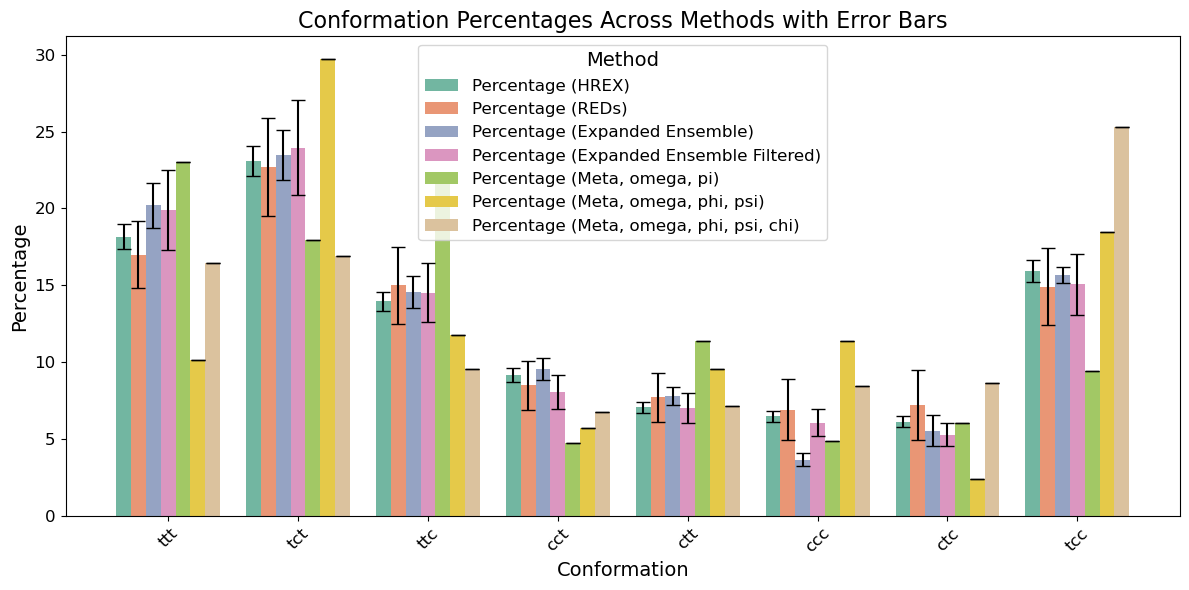

In [6]:
# Plot with Seaborn
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    x="Conformation",
    y="Percentage",
    hue="Method",
    data=df_melt,
    palette="Set2",
    dodge=True
)

# Add error bars
for bar, error in zip(barplot.patches, df_melt["Error"]):
    # Calculate the bar center
    bar_center = bar.get_x() + bar.get_width() / 2
    # Add error bars
    plt.errorbar(
        bar_center,
        bar.get_height(),
        yerr=error,
        fmt='none',  # No marker
        ecolor='black',  # Error bar color
        capsize=5  # Error bar cap size
    )

# Finalize plot
plt.title("Conformation Percentages Across Methods with Error Bars", fontsize=16)
plt.xlabel("Conformation", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Method", fontsize=12, title_fontsize=14, loc="best")
plt.tight_layout()
plt.show()